In [4]:
import os
import numpy as np

traindir = os.path.join(args.data, 'train')
valdir = os.path.join(args.data, 'val')
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

train_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(traindir, transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize,
    ])),
    batch_size=args.batch_size, shuffle=True,
    num_workers=args.workers, pin_memory=True)

val_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(valdir, transforms.Compose([
        transforms.Scale(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize,
    ])),
    batch_size=args.batch_size, shuffle=False,
    num_workers=args.workers, pin_memory=True)

ModuleNotFoundError: No module named 'meach'

/home/cxking/.local/lib/python3.6/site-packages/torchvision/transforms/functional.py:74: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 768, 1024])


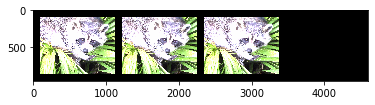

In [5]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

import scipy.misc

lena = scipy.misc.face()
img = transforms.ToTensor()(lena)
print(img.size())

torch.Size([3, 768, 1024])
imglist = [img, img, img, img.clone().fill_(-10)]

show(make_grid(imglist, padding=100))

show(make_grid(imglist, padding=100, normalize=True))

show(make_grid(imglist, padding=100, normalize=True, range=(0, 1)))

show(make_grid(imglist, padding=100, normalize=True, range=(0, 0.5)))

show(make_grid(imglist, padding=100, normalize=True, scale_each=True))

show(make_grid(imglist, padding=100, normalize=True, range=(0, 0.5), scale_each=True))


In [10]:
# coding=utf-8
import matplotlib as mpl
mpl.use('tkagg')   # 调试：agg;  运行： tkagg
import matplotlib.pyplot as plt
 
import os
import pandas as pd
import torch
 
"""
torch.utils.data.Dataset 是一个表示数据集的抽象类.
你自己的数据集一般应该继承``Dataset``, 并且重写下面的方法:
    1. __len__ 使用``len(dataset)`` 可以返回数据集的大小
    2. __getitem__ 支持索引, 以便于使用 dataset[i] 可以 获取第i个样本(0索引)
"""
from torch.utils.data import Dataset
 
 
"""
torch.utils.data中的DataLoader提供为Dataset类对象提供了:
    1.批量读取数据
    2.打乱数据顺序
    3.使用multiprocessing并行加载数据
    
    DataLoader中的一个参数collate_fn：可以使用它来指定如何精确地读取一批样本，
     merges a list of samples to form a mini-batch.
    然而，默认情况下collate_fn在大部分情况下都表现很好
"""
from torch.utils.data import DataLoader
from torchvision import transforms, utils
from skimage import io, transform
import numpy as np
 
 
def just_see_face_dataset():
    """
    摸一下数据
    :return: 
    """
    landmarks_frame = pd.read_csv('./faces/face_landmarks.csv')
    n = 65
    img_name = landmarks_frame.iloc[n, 0]
    landmarks = landmarks_frame.iloc[n, 1:].as_matrix()    # as_matrix()
    landmarks = landmarks.astype('float').reshape(-1, 2)
    print('img_name: {}'.format(img_name))
    print('landmarks shape: {}'.format(landmarks.shape))
    print('first 4 landmarks: {}'.format(landmarks[:4]))
 
    plt.figure()
    show_landmarks(io.imread(os.path.join('faces', img_name)), landmarks)
    plt.show()
 
 
def show_landmarks(image, landmarks):
    """
    显示一张图片和它对应的标记点
    :param image:
    :param landmarks:
    :return:
    """
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)
 
 
class FaceLandmarksDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
 
    def __len__(self):
        """
        继承 Dataset 类后,必须重写的一个方法
        返回数据集的大小
        :return:
        """
        return len(self.landmarks_frame)
 
    def __getitem__(self, idx):
        """
        继承 Dataset 类后,必须重写的一个方法
        返回第 idx 个图像及相关信息
        :param idx:
        :return:
        """
        img_name = os.path.join(self.root_dir, self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:].as_matrix()
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}
 
        if self.transform:
            sample = self.transform(sample)
 
        return sample
 
 
def t_dataset():
    """
    测试 FaceLandmarksDataset 类的使用
    :return: 
    """
    # 实列化 FaceLandmarksDataset 类
    face_dataset = FaceLandmarksDataset(csv_file='./faces/face_landmarks.csv', root_dir='./faces')
    fig = plt.figure()
    length_dataset = len(face_dataset)
 
    for i in range(length_dataset):
        # 注: Dataset 类对象可以直接索引[i]访问
        sample = face_dataset[i]
        print(i, sample['image'].shape, sample['landmarks'].shape)
 
        ax = plt.subplot(1, 4, i + 1)
        plt.tight_layout()
        ax.set_title('sample #{}'.format(i))
        ax.axis('off')
        show_landmarks(sample['image'], sample['landmarks'])
        if i == 3:
            plt.show()
            break
 
 
"""Transform操作"""
class Rescale(object):
    """按照给定尺寸更改一个图像的尺寸
    
    Args:
        output_size (tuple or int): 要求输出的尺寸.  如果是个元组类型, 输出
        和output_size匹配. 如果时int类型,图片的短边和output_size匹配, 图片的
        长宽比保持不变.
    """
 
    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size
 
    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']
 
        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size
 
        new_h, new_w = int(new_h), int(new_w)
 
        img = transform.resize(image, (new_h, new_w))
 
        # 对于标记点, h和w需要交换位置, 因为对于图像, x和y分别时第1维和第0维
        landmarks = landmarks * [new_w / w, new_h / h]
 
        # 返回值实际上也是一个sample
        return {'image': img, 'landmarks': landmarks}
 
 
class RandomCrop(object):
    """随机裁剪图片
    Args:
        output_size (tuple or int): 期望输出的尺寸, 如果时int类型, 裁切成正方形.
    """
 
    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size
 
    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']
 
        h, w = image.shape[:2]
        new_h, new_w = self.output_size
 
        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)
 
        image = image[top: top + new_h,
                      left: left + new_w]
 
        landmarks = landmarks - [left, top]
 
        # 返回值实际上也是一个sample
        return {'image': image, 'landmarks': landmarks}
 
 
class ToTensor(object):
    """
    将 ndarray 的样本转化为 Tensor 的样本
    """
    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']
 
        # 交换轴，因为 numpy 图片：H x W x C, torch输入图片要求： C x H x W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image), 'landmarks': torch.from_numpy(landmarks)}
 
 
def use_transoform(one_sample):
    """
    演示如何使用 transform: 把几种 transform 组合在一起
    :return: 
    """
    # transforms.Compose 只是将这两种tranform组合在一起，按顺序对sample进行处理
    composed = transforms.Compose([Rescale(256), RandomCrop(224)])
    transfromed_sample = composed(one_sample)
    plt.figure()
    show_landmarks(transfromed_sample['image'], transfromed_sample['landmarks'])
    plt.show()
 
 
def union_all_knowledge():
    """
    迭代整个数据集：
        每次迭代数据，都会1.从文件中读取图像    2.对所读取的图像应用上述变换transform。 从而对数据集进行增强操作
    :return: 
    """
    transformed_dataset = FaceLandmarksDataset(csv_file='./faces/face_landmarks.csv', root_dir='./faces',
                                               transform=transforms.Compose([
                                                   Rescale(256),
                                                   RandomCrop(225),
                                                   ToTensor()]))
    for i in range(len(transformed_dataset)):
        sample = transformed_dataset[i]
        print(i, sample['image'].size(), sample['landmarks'].size())
        if i == 3:
            break
 
 
def t_dataloader():
    transformed_dataset = FaceLandmarksDataset(csv_file='./faces/face_landmarks.csv', root_dir='./faces',
                                               transform=transforms.Compose([
                                                   Rescale(256),
                                                   RandomCrop(225),
                                                   ToTensor()]))
    dataloader = DataLoader(transformed_dataset, batch_size=4, shuffle=True, num_workers=2)
 
    # 对dataloader对象进行迭代，读取数据
    for i_batch, sample_batched in enumerate(dataloader):
        image_batch, landmarks_batch = sample_batched['image'], sample_batched['landmarks']
        print('i_batch: {}, image_batch.size(): {}, landmarks_batch.size(): {}'.format(
            i_batch, image_batch.size(), landmarks_batch.size()))
 
 
if __name__ == '__main__':
    # just_see_face_dataset()
 
    # t_dataset()
 
    # face_dataset = FaceLandmarksDataset(csv_file='./faces/face_landmarks.csv', root_dir='./faces')
    # one_sample = face_dataset[0]
    # use_transoform(one_sample)
 
    # union_all_knowledge()
 
    t_dataloader()
 
 
 
 
 

ModuleNotFoundError: No module named 'tkinter'